In [2]:
import tensorflow as tf
from src.dataset import dataset_tf, validation_tf
from src.audio import to_mfccs_dataset
from src.model import get_seq_model, get_conv_model, callbacks
from src.plots import plot_history, plot_mfccs

In [27]:
train_ds, val_ds, label_names = dataset_tf("./dataset/sbcm", 0.85)

Found 688 files belonging to 2 classes.
Using 104 files for training.
Using 584 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (32, 4000)
Example label shape: (32,)
513 44100
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)


In [28]:
train_mfccs_ds = to_mfccs_dataset(train_ds)
val_mfccs_ds = to_mfccs_dataset(val_ds)

513 44100
513 44100


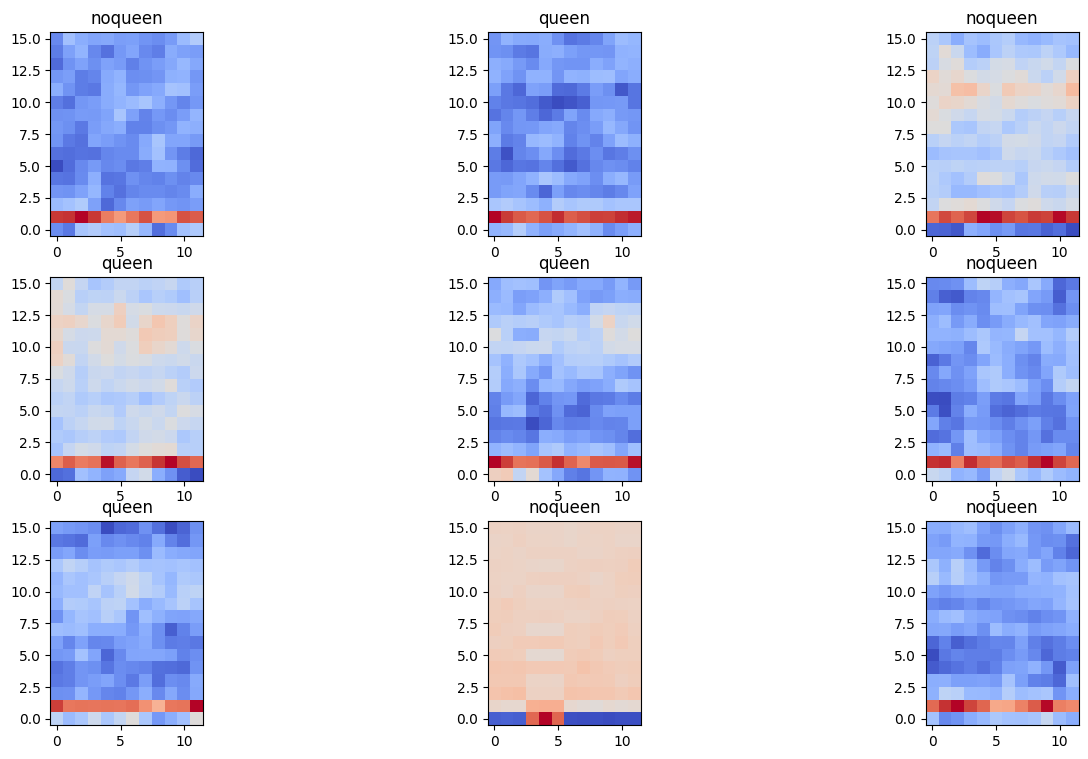

In [29]:
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break

input_shape = example_spectrograms.shape[1:]
plot_mfccs(example_spectrograms, example_spect_labels, label_names)

In [30]:
train_mfccs_ds = train_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
val_mfccs_ds = val_mfccs_ds.map(lambda x, y: (tf.expand_dims(x, -1), y))
for example_spectrograms, example_spect_labels in train_mfccs_ds.take(1):
  break
input_shape = example_spectrograms.shape[1:]
input_shape

TensorShape([12, 16, 1])

In [31]:
train_mfccs_ds = train_mfccs_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_mfccs_ds = val_mfccs_ds.cache().prefetch(tf.data.AUTOTUNE)

# Conv

In [32]:
model_conv = get_conv_model(input_shape, len(label_names))
model_conv.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [33]:
history = model_conv.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
4/4 [==============================] - 1s 227ms/step - loss: 0.7023 - accuracy: 0.4904 - val_loss: 0.7004 - val_accuracy: 0.5188
Epoch 2/20
4/4 [==============================] - 0s 33ms/step - loss: 0.6516 - accuracy: 0.5769 - val_loss: 0.6368 - val_accuracy: 0.6695
Epoch 3/20
4/4 [==============================] - 0s 32ms/step - loss: 0.5769 - accuracy: 0.7404 - val_loss: 0.6108 - val_accuracy: 0.6644
Epoch 4/20
4/4 [==============================] - 0s 31ms/step - loss: 0.5525 - accuracy: 0.7500 - val_loss: 0.6049 - val_accuracy: 0.7140
Epoch 5/20
4/4 [==============================] - 0s 31ms/step - loss: 0.5220 - accuracy: 0.7500 - val_loss: 0.5800 - val_accuracy: 0.6969
Epoch 6/20
4/4 [==============================] - 0s 29ms/step - loss: 0.4883 - accuracy: 0.7788 - val_loss: 0.5793 - val_accuracy: 0.7397
Epoch 7/20
4/4 [==============================] - 0s 29ms/step - loss: 0.4601 - accuracy: 0.7692 - val_loss: 0.5573 - val_accuracy: 0.7260
Epoch 8/20
4/4 [==========

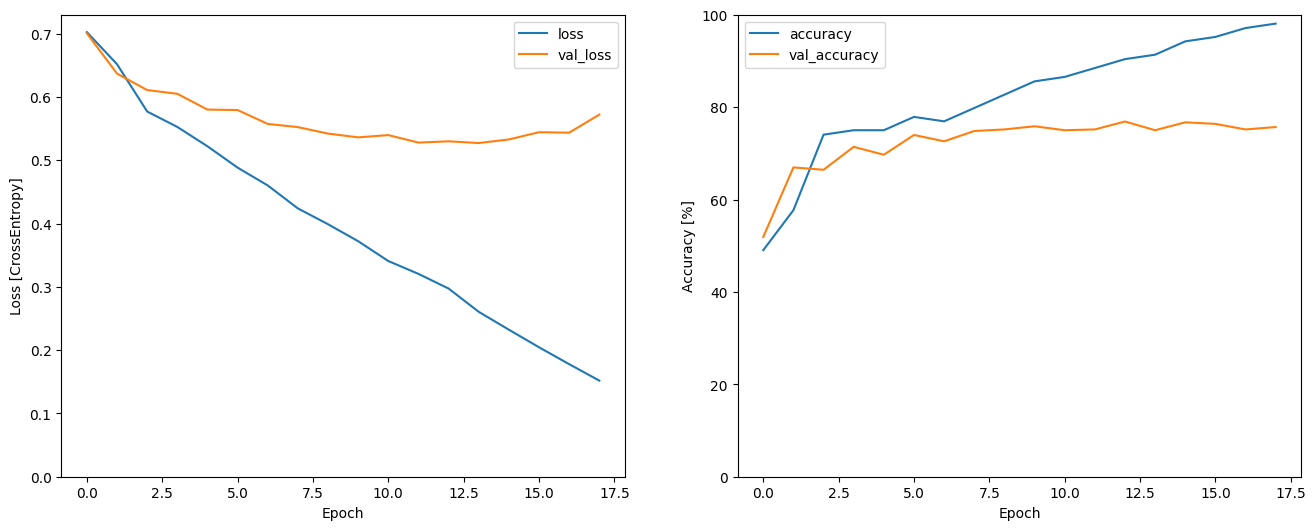

In [34]:
plot_history(history)

# Reinforce

In [35]:
model = tf.keras.models.load_model("osbh.h5")

### Check non-reinforced model perf

In [36]:
results = model.evaluate(val_mfccs_ds)

19/19 [==============================] - 0s 6ms/step - loss: 1.6523 - accuracy: 0.4743


In [37]:
history = model.fit(
    train_mfccs_ds, 
    validation_data=val_mfccs_ds, 
    epochs=50,
    callbacks=callbacks
)

Epoch 1/50


4/4 [==============================] - 0s 59ms/step - loss: 1.5446 - accuracy: 0.5192 - val_loss: 1.2872 - val_accuracy: 0.5925
Epoch 2/50
4/4 [==============================] - 0s 33ms/step - loss: 0.8919 - accuracy: 0.6250 - val_loss: 1.0762 - val_accuracy: 0.5086
Epoch 3/50
4/4 [==============================] - 0s 33ms/step - loss: 0.6163 - accuracy: 0.6731 - val_loss: 0.9823 - val_accuracy: 0.6490
Epoch 4/50
4/4 [==============================] - 0s 32ms/step - loss: 0.6711 - accuracy: 0.7500 - val_loss: 0.6168 - val_accuracy: 0.7140
Epoch 5/50
4/4 [==============================] - 0s 30ms/step - loss: 0.4464 - accuracy: 0.7788 - val_loss: 0.7140 - val_accuracy: 0.5959
Epoch 6/50
4/4 [==============================] - 0s 33ms/step - loss: 0.5038 - accuracy: 0.7115 - val_loss: 0.5713 - val_accuracy: 0.7414
Epoch 7/50
4/4 [==============================] - 0s 31ms/step - loss: 0.3596 - accuracy: 0.8077 - val_loss: 0.6030 - val_accuracy: 0.7466
Epoch 8/50
4/4 [======================

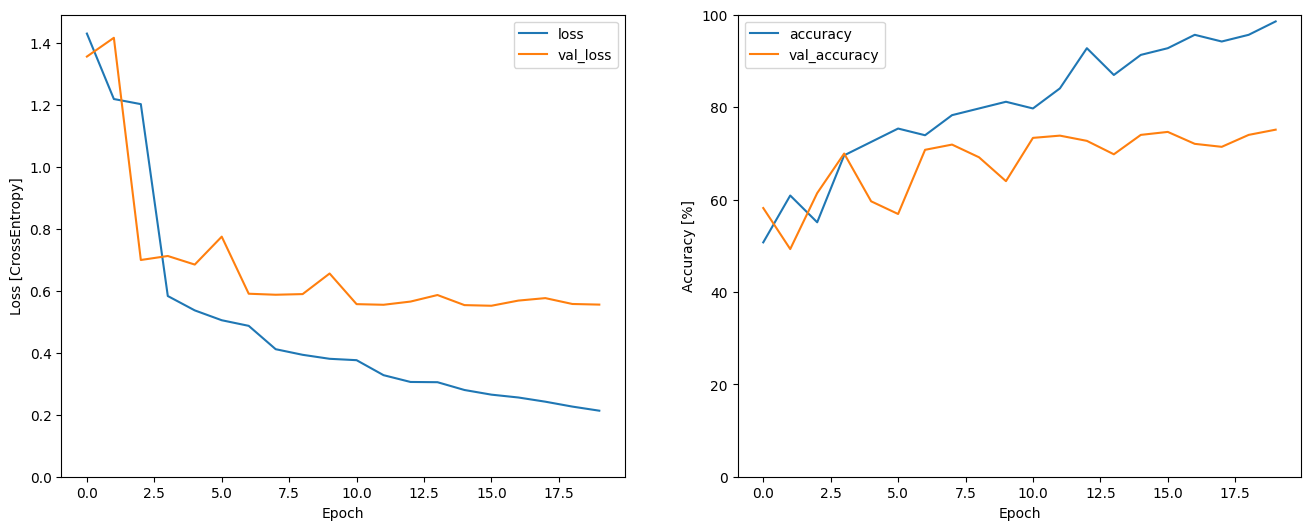

In [26]:
plot_history(history)